## Simulaitng Hawkes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Inital values
X0 = 1
lambda0 = 0.2
timestep = 0.01
T = 100


#Baseline parameters
mu = 1
alpha = 0.9
beta = 0.5

#Generating X_n (X_t denotes the jump of a proces i.e. N_(t + dt) - N_t)
def uniform_randomness(lmbd, timestep):
    U = np.random.uniform(0, 1)  
    if U <= lmbd * timestep:
        return 1
    else:
        return 0
    
#Calcuating lambda_n
def lmbd_next(lmbd_prev, X_prev, timestep=1, alpha=0.9, beta=0.5, mu=1):
    lmbd_next = mu * (1 - np.exp(-beta * timestep)) + np.exp(-beta * timestep) * lmbd_prev + alpha * X_prev
    return lmbd_next



def simulate(T, X0, timestep = 0.1, alpha = 0.9, beta = 5, mu = 1):
    #Simulate Hawkes
    N = np.zeros(T)
    lmbd = np.zeros(T)
    X = np.zeros(T)
    lmbd[0] = mu
    X[0] = X0
    N[0] = X[0]
    for i in range(T):
        lmbd[i] = lmbd_next(lmbd[i-1], X[i-1], timestep, alpha, beta,mu)
        #print(lmbd[i])
        X[i] = uniform_randomness(lmbd[i], timestep)
        #print(X[i])
        N[i] =N[i-1] +  X[i]
    return N, lmbd, X


In [368]:
N, lmbd, X = simulate(T, X0)
N1, lmbd1, X1 = simulate(T, X0, timestep = 0.1, alpha = 0.9)
N2, lmbd2, X2 = simulate(T, X0, timestep = 0.1, alpha = -0.9)

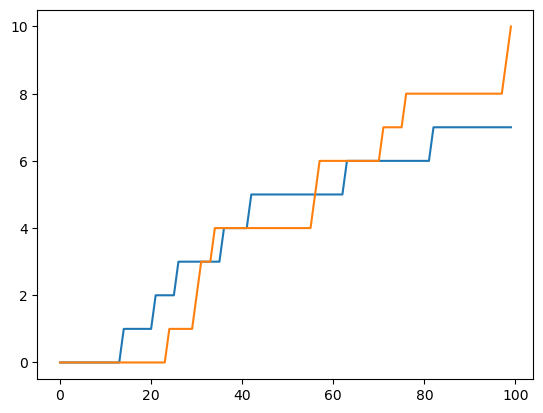

In [165]:
plt.plot(N)
plt.plot(N1)
#plt.plot(N2)

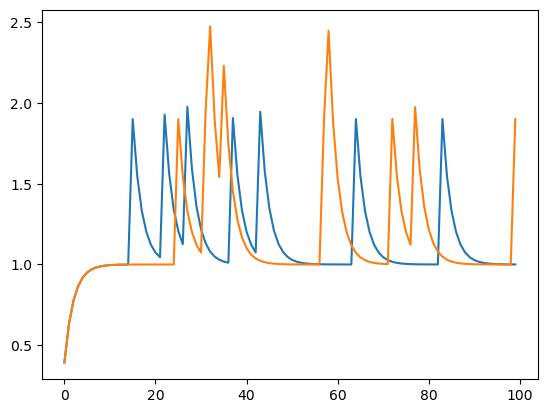

In [166]:
plt.plot(lmbd)
plt.plot(lmbd1)
#plt.plot(lmbd2)

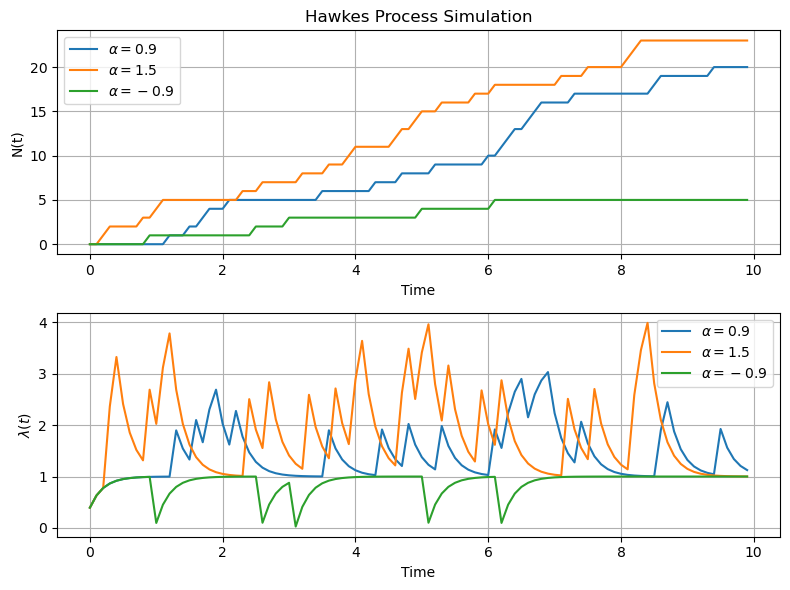

In [518]:
T = 100
timestep = 0.1
# Simulate the process for different alphas
N, lmbd, X = simulate(T, X0)
N1, lmbd1, X1 = simulate(T, X0, timestep=0.1, alpha=1.5)
N2, lmbd2, X2 = simulate(T, X0, timestep=0.1, alpha=-0.9)

# Plotting the results
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(T) * timestep, N, label=r'$\alpha = 0.9$')
plt.plot(np.arange(T) * timestep, N1, label=r'$\alpha = 1.5$')
plt.plot(np.arange(T) * timestep, N2, label=r'$\alpha = -0.9$')
plt.title('Hawkes Process Simulation')
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(np.arange(T) * timestep, lmbd, label=r'$\alpha = 0.9$')
plt.plot(np.arange(T) * timestep, lmbd1, label=r'$\alpha = 1.5$')
plt.plot(np.arange(T) * timestep, lmbd2, label=r'$\alpha = -0.9$')
#plt.scatter(np.arange(T) * timestep, X, label='alpha = 0.9')
plt.xlabel('Time')
plt.ylabel(r'$\lambda(t)$')
plt.legend()
plt.grid()

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('univ_hp.pdf')

# Display the plot
plt.show()

## Random graphs simulation

In [576]:
def generate_matrix(N, val, prob):
    np.random.seed(123)
    
    # Create an empty matrix
    matrix = np.zeros((N, N))
    
    # Fill the upper triangle of the matrix
    upper_triangle_indices = np.triu_indices(N)
    upper_triangle_values = np.random.choice(val, size=len(upper_triangle_indices[0]), p=prob)
    matrix[upper_triangle_indices] = upper_triangle_values
    
    # Mirror the upper triangle to the lower triangle to make it symmetric
    i_lower = np.tril_indices(N, -1)
    matrix[i_lower] = matrix.T[i_lower]
    
    return matrix

num_nodes = 1000
G = generate_matrix(num_nodes, [0, 1, -1], [0.2, 0.55, 0.25])
#print(matrix)

In [139]:
#Create a matrix of lambdas
lmbd_matrix = np.zeros((T,N ))
N_matrix = np.zeros((T, N))

for i in range(N):
    N_matrix[:, i], lmbd_matrix[:, i] = simulate(T, X0, lambda0, seed = i)
    

G

In [140]:
lmbd_matrix

array([[0.39346934, 0.39346934, 0.39346934, ..., 0.39346934, 0.39346934,
        0.39346934],
       [0.63212056, 0.63212056, 0.63212056, ..., 0.63212056, 0.63212056,
        0.63212056],
       [0.77686984, 0.77686984, 1.67686984, ..., 0.77686984, 0.77686984,
        0.77686984],
       ...,
       [1.01109575, 1.00000012, 1.0744421 , ..., 1.868564  , 1.40307753,
        1.0013532 ],
       [1.90672991, 1.00000007, 1.04515142, ..., 2.42681069, 1.24447888,
        1.00082076],
       [1.54995949, 1.90000004, 1.02738572, ..., 1.86540443, 1.14828394,
        1.00049781]])

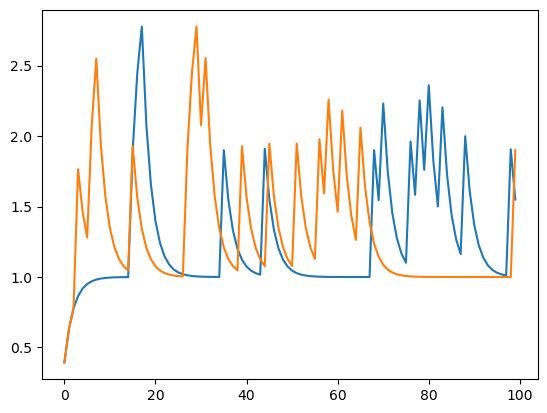

In [138]:
plt.plot(lmbd_matrix[:, 0])
plt.plot(lmbd_matrix[:, 1])

In [585]:
#Calcuating lambda_n
def lmbd_next_comb(lmbd_prev,G, X_prev, index, timestep=0.1, alpha=0.9, beta=0.5, mu=0.5):
    lmbd_next = mu * (1 - np.exp(-beta * timestep)) + np.exp(-beta * timestep) * lmbd_prev[index] + alpha/G.shape[0] * np.dot(X_prev,G)
    return lmbd_next

In [172]:
#Calcuating lambda_n
def lmbd_next_mf(lmbd_prev, e = 0.2,  timestep=0.1, alpha=0.9, beta=0.5, mu=0.5):
    lmbd_next = mu * (1 - np.exp(-beta * timestep)) + np.exp(-beta * timestep)*(1 + alpha *timestep*e) * lmbd_prev
    return lmbd_next

In [590]:
def simulate_comb(T, num_nodes, X0, timestep=0.1, alpha=5, beta=10, mu=0.5):
    lambda0_vec = np.full(num_nodes, mu)
    X0_vec = np.full(num_nodes, X0)
    G = generate_matrix(num_nodes, [0, 1, -1],[0.2, 0.55, 0.25] )

    # Simulate Hawkes
    N = np.zeros((T, num_nodes))
    lmbd = np.zeros((T, num_nodes))
    X = np.zeros((T, num_nodes))

    lmbd[0, :] = lambda0_vec
    X[0, :] = X0_vec
    N[0, :] = X[0, :]

    for i in range(1, T):
        for j in range(num_nodes):
            np.random.seed(j)
            lmbd[i, j] = lmbd_next_comb(lmbd[i-1, :], G[j, :], X[i-1, :], j, timestep, alpha, beta, mu)
            X[i, j] = uniform_randomness(lmbd[i, j], timestep)
            #print(X[i, j])
            N[i, j] = N[i-1, j] + X[i, j]

    return N, lmbd, X

In [573]:
def simulate_mf(T, X0, seed, e = 0.2, timestep = 0.1, alpha = 5, beta = 10, mu = 0.5):
    np.random.seed(seed)
    #Simulate Hawkes
    N = np.zeros(T)
    lmbd = np.zeros(T)
    X = np.zeros(T)

    lmbd[0] = mu
    X[0] = X0
    N[0] = X[0]
    for i in range(1,T):
        lmbd[i] = lmbd_next_mf(lmbd[i-1],e, timestep, alpha, beta, mu)
        #print(lmbd[i])
        #print(i)
        X[i] = uniform_randomness(lmbd[i], timestep)
        #print(X[i])
        N[i] =N[i-1] +  X[i]
    return N, lmbd, X

In [533]:
num_nodes = 1000
T = 1000
N_comb, lmbd_comb ,X_comb = simulate_comb(T,num_nodes, X0)

chosen_index = 20
N_mf, lmbd_mf, X_mf = simulate_mf(T, X0, chosen_index)

In [312]:
lmbd_comb[0, chosen_index]

0.5

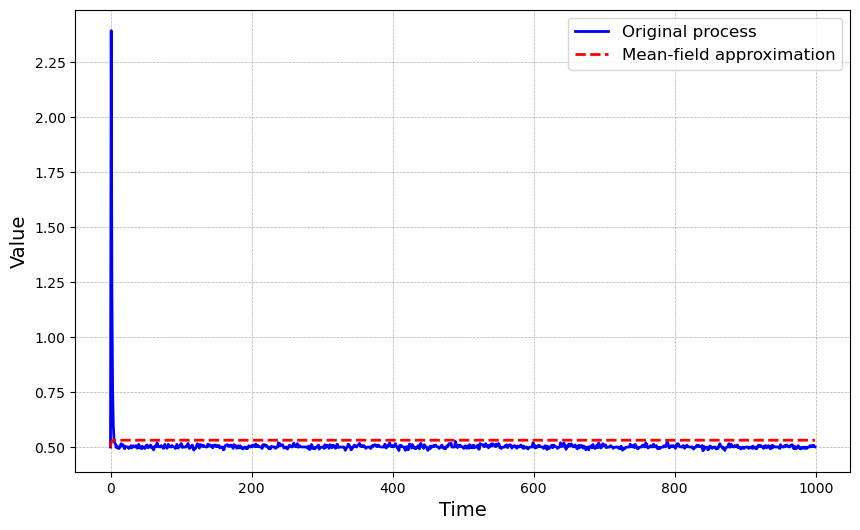

In [597]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(lmbd_comb[:, chosen_index], label='Original process', color='blue', linestyle='-', linewidth=2)
plt.plot(lmbd_mf, label='Mean-field approximation', color='red', linestyle='--', linewidth=2)
#plt.plot(X_comb[:, chosen_index], label='X_comb[:, chosen_index]', color='green', linestyle=':', linewidth=2)

# Add labels
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Add title
#plt.title('Example Plot', fontsize=16)

# Add legend

plt.legend(loc='best', fontsize=12)

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig('mf.pdf')

# Show the plot
plt.show()


In [583]:
lmbd_comb[:10, chosen_index]

array([0.5       , 2.39345315, 1.19656248, 0.75625102, 0.59426948,
       0.5346798 , 0.51917647, 0.51347312, 0.498538  , 0.50588064])

In [574]:
# Define a function for the plots as given
def plot(chosen_index, X0, alpha, beta, mu, lmbd=False, num_nodes=1000, T=1000):
    N_comb, lmbd_comb, X_comb = simulate_comb(T, num_nodes, X0, alpha=alpha, beta=beta, mu=mu)
    N_mf, lmbd_mf, X_mf = simulate_mf(T, X0, chosen_index, alpha=alpha, beta=beta, mu=mu)

    if lmbd:
        plt.plot(lmbd_comb[:, chosen_index], label='Original process', color='blue', linestyle='-', linewidth=2)
        plt.plot(lmbd_mf, label='Mean-field approximation', color='red', linestyle='--', linewidth=2)
    else:
        plt.plot(N_comb[:, chosen_index], label='Original process', color='blue', linestyle='-', linewidth=2)
        plt.plot(N_mf, label='Mean-field approximation', color='red', linestyle='--', linewidth=2)

    #plt.xlabel('Time', fontsize=14)
    #plt.ylabel('Value', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

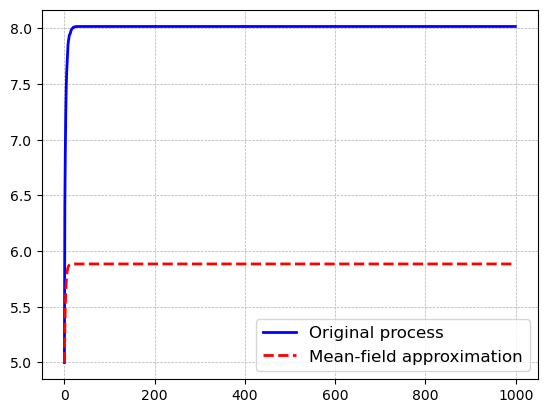

In [596]:
plot(20, X0, alpha = 5, beta =5.1, mu = 5, lmbd = True)

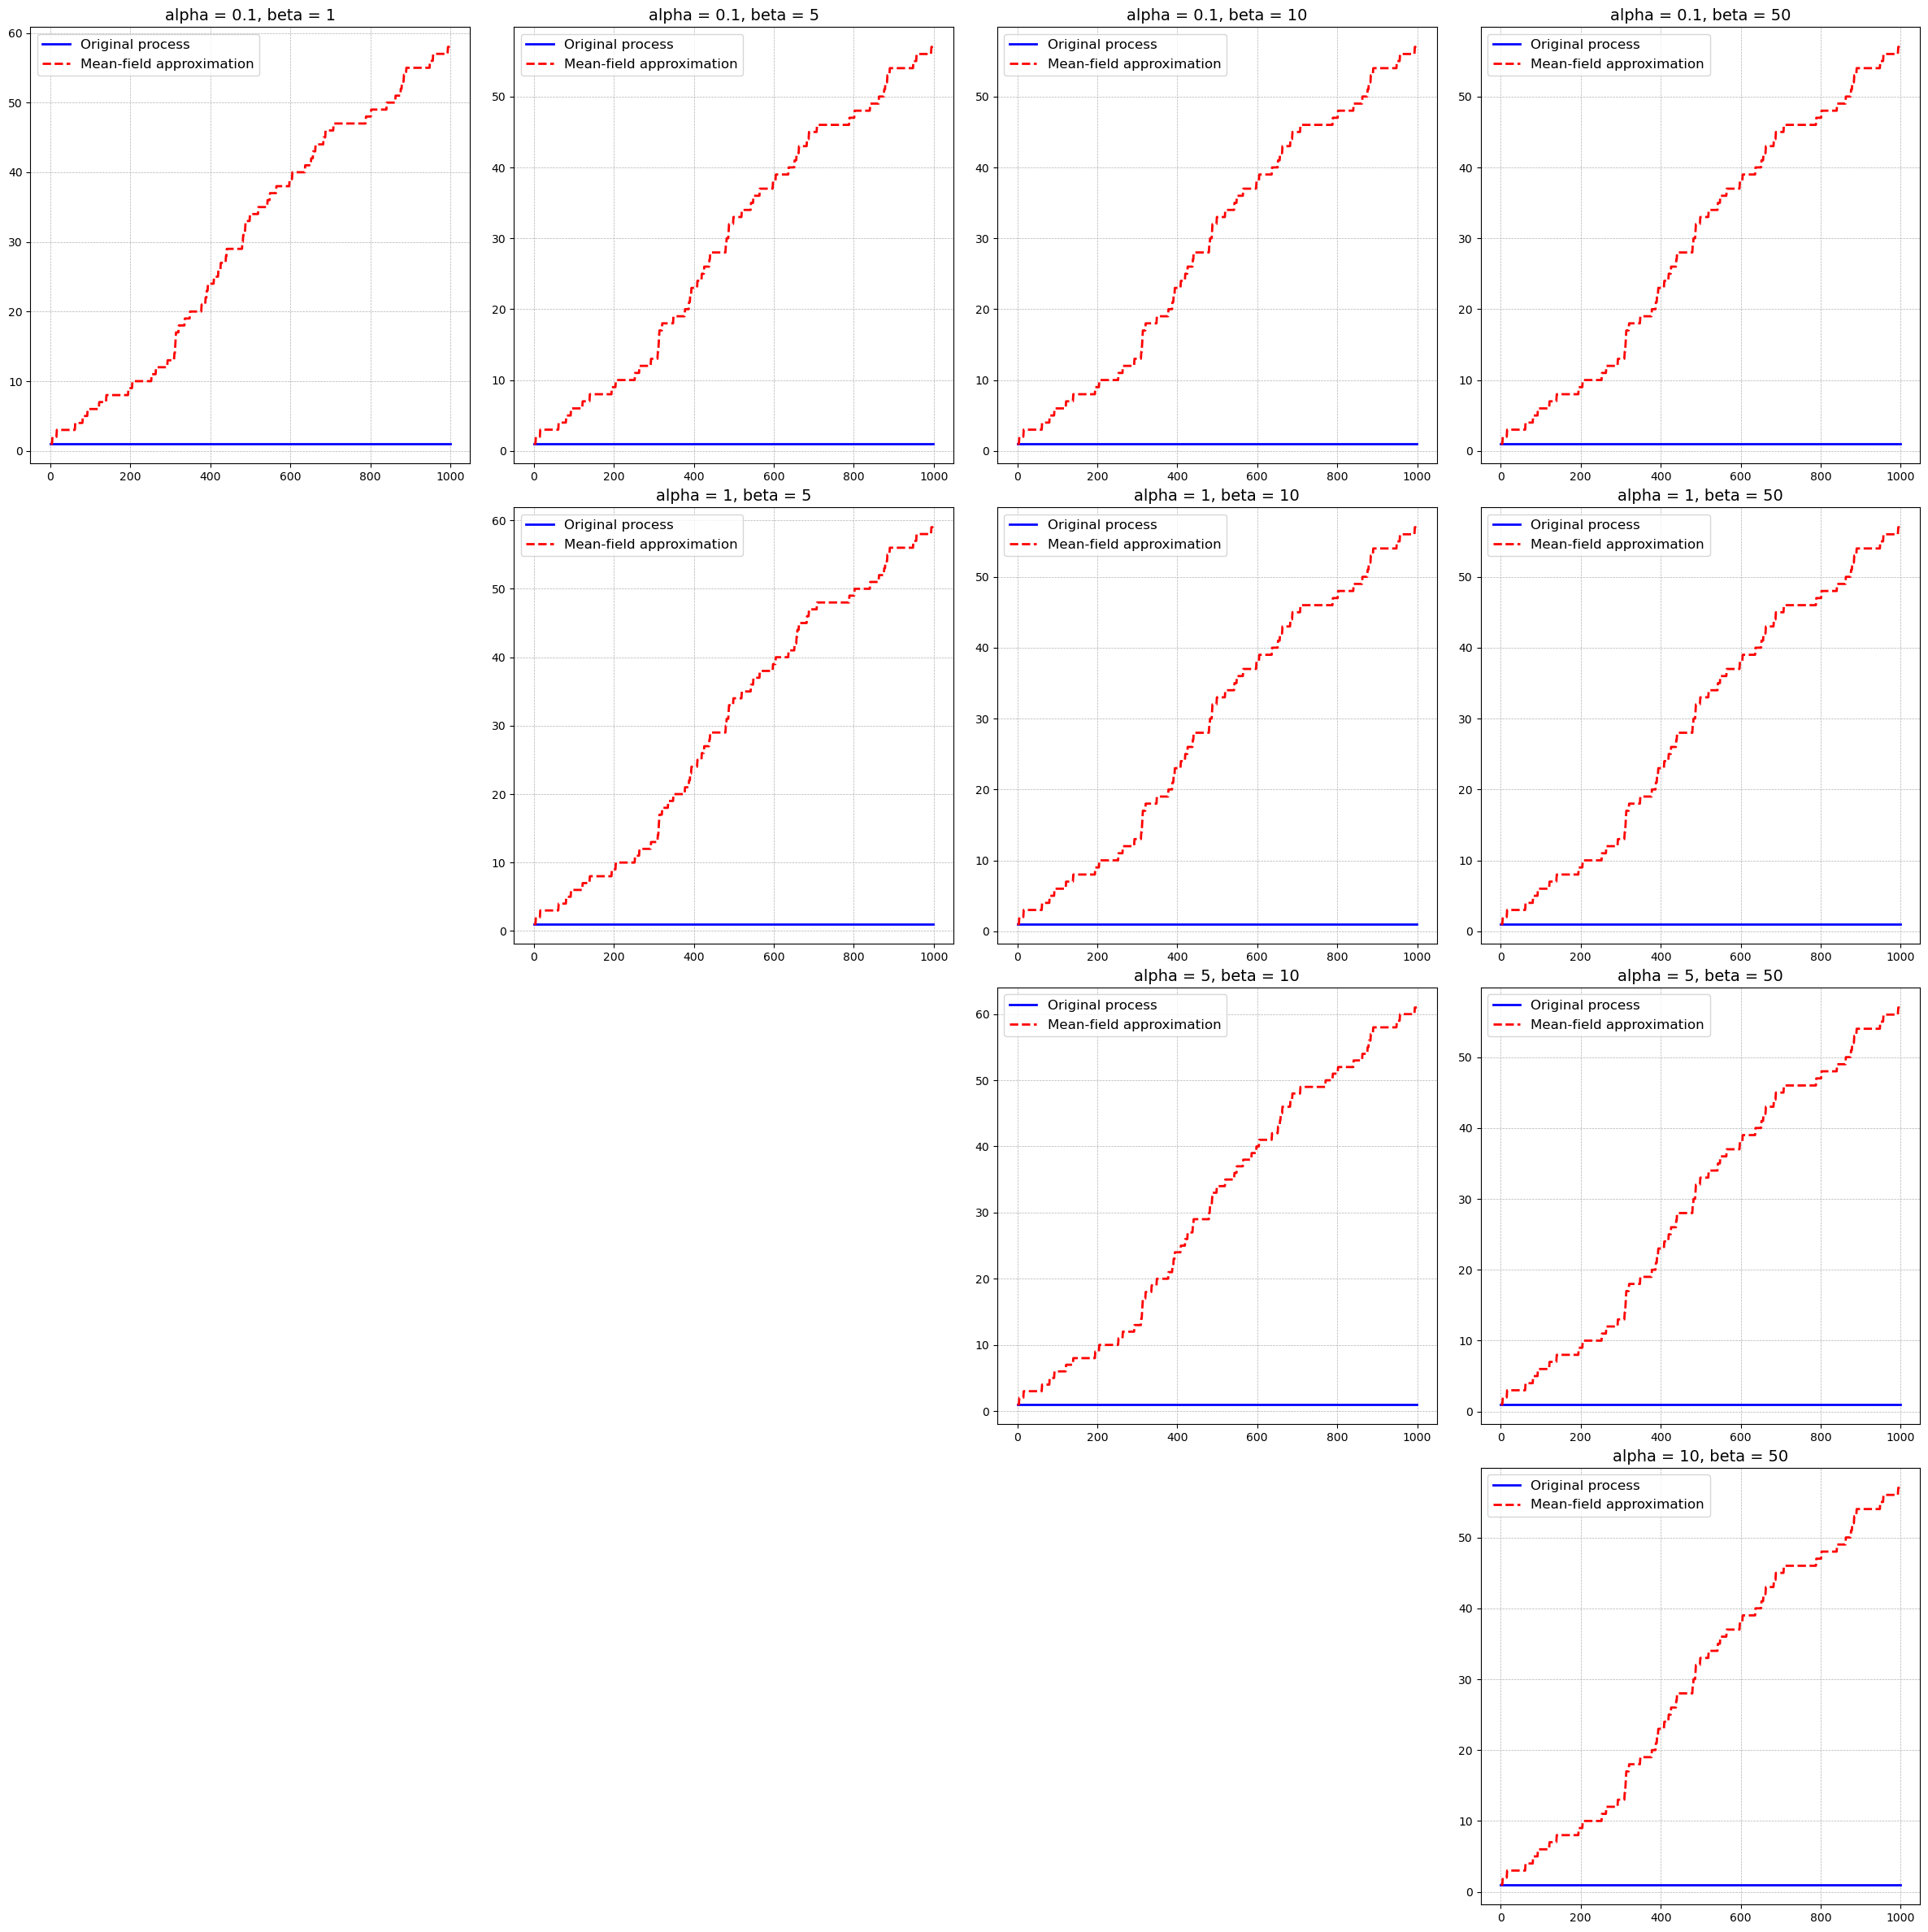

In [598]:
# Parameters
alphas = [0.1, 1, 5, 10]
betas = [1, 5, 10, 50]
chosen_index = 20
X0 = 1
mu = 0.5

# Create a grid of plots
fig, axes = plt.subplots(len(alphas), len(betas), figsize=(30, 30))
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Iterate over alpha and beta values
for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        if alpha < beta:
            plt.sca(axes[i, j])
            plot(chosen_index, X0, alpha, beta, mu, lmbd=False, num_nodes=1000, T=1000)
            plt.title(f'alpha = {alpha}, beta = {beta}', fontsize=14)
        else:
            axes[i, j].axis('off')  # Hide the subplot for invalid combinations

# Show the grid of plots
plt.savefig("hp_different_parmas_1")
plt.show()

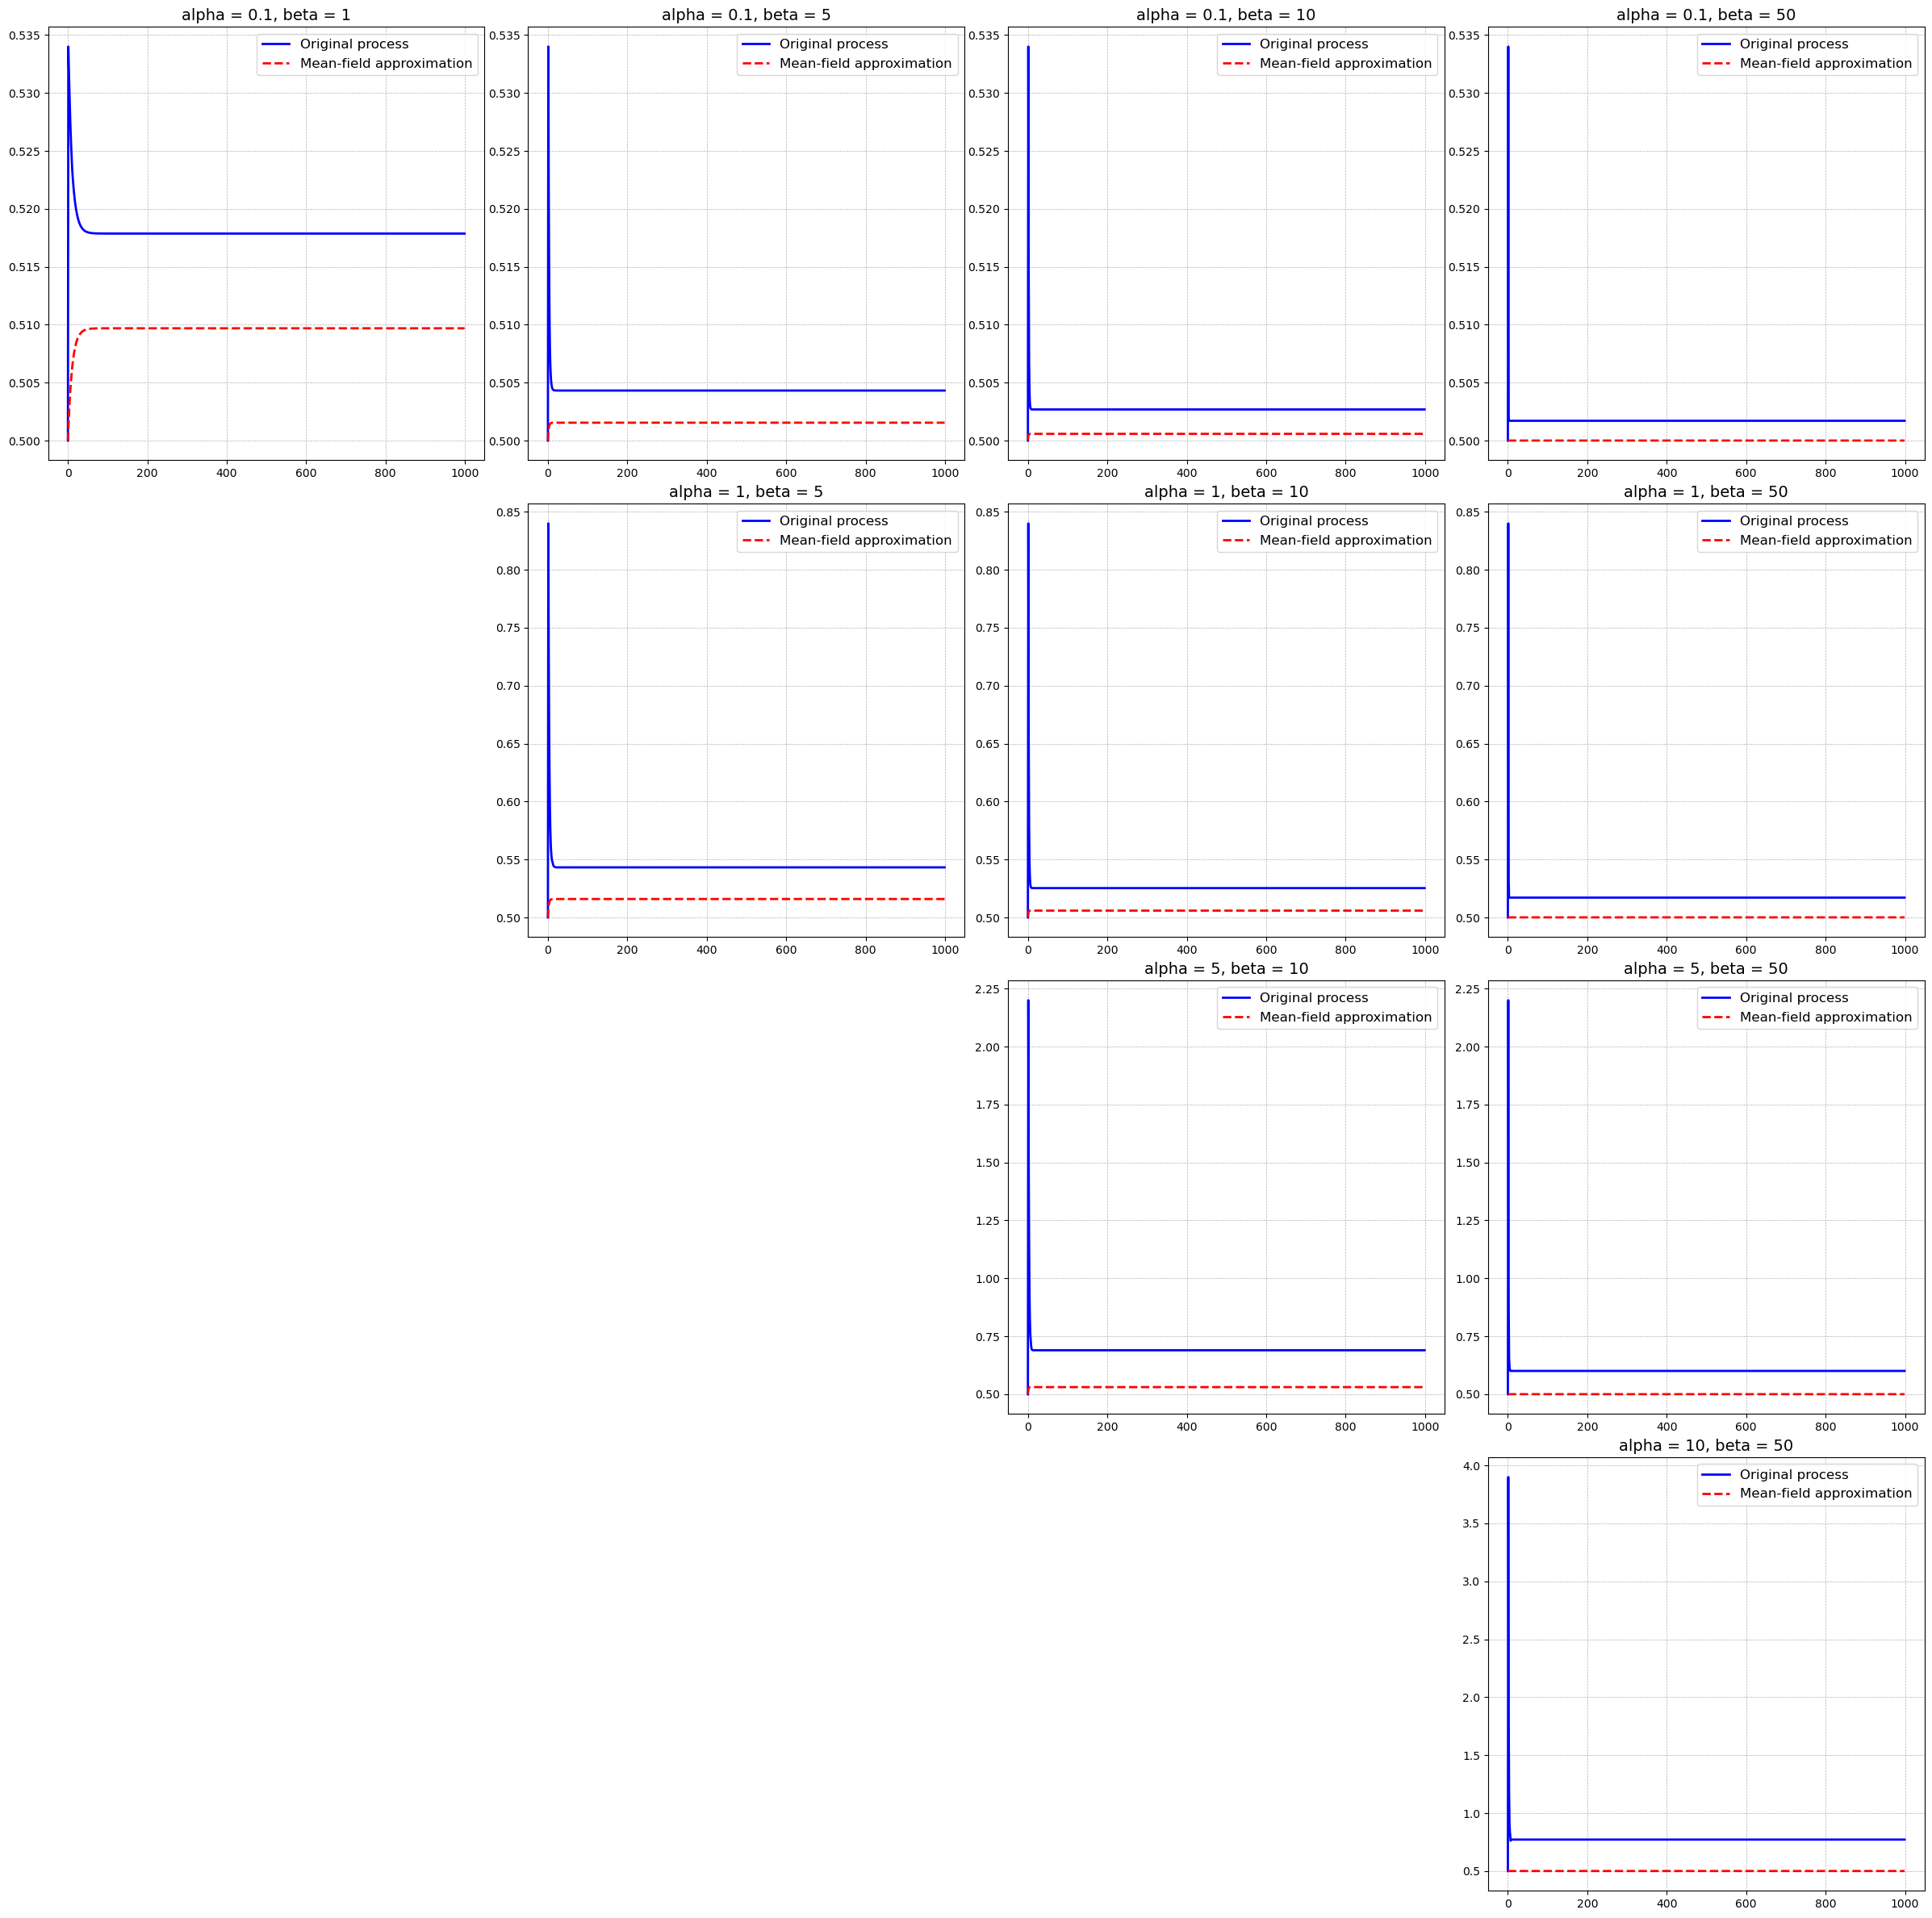

In [599]:
# Parameters
alphas = [0.1, 1, 5, 10]
betas = [1, 5, 10, 50]
chosen_index = 0
X0 = 1
mu = 0.5

# Create a grid of plots
fig, axes = plt.subplots(len(alphas), len(betas), figsize=(30, 30))
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Iterate over alpha and beta values
for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        if alpha < beta:
            plt.sca(axes[i, j])
            plot(chosen_index, X0, alpha, beta, mu, lmbd=True, num_nodes=1000, T=1000)
            plt.title(f'alpha = {alpha}, beta = {beta}', fontsize=14)
        else:
            axes[i, j].axis('off')  # Hide the subplot for invalid combinations

# Show the grid of plots
# Show the grid of plots
plt.savefig("lambda_different_parmas_1")
plt.show()

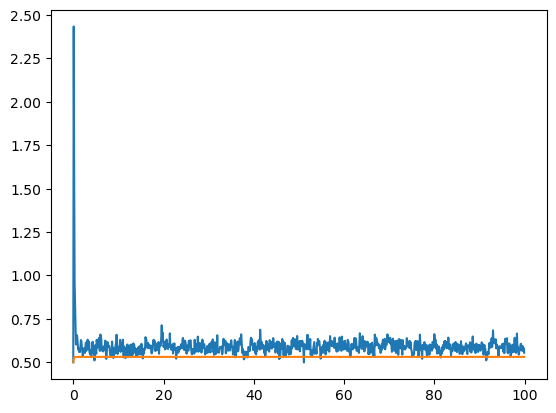

In [462]:
plt.plot(np.arange(T) * timestep, lmbd_comb[:, chosen_index])
plt.plot(np.arange(T) * timestep, lmbd_mf)
#plt.scatter(np.arange(T) * timestep, X_comb[:, chosen_index])
#plt.scatter(np.arange(T) * timestep, X_mf)

In [394]:
lmbd_mf

array([0.5       , 0.51839397, 0.52583741, 0.52884953, 0.53006844,
       0.53056169, 0.53076129, 0.53084206, 0.53087475, 0.53088798,
       0.53089333, 0.53089549, 0.53089637, 0.53089673, 0.53089687,
       0.53089693, 0.53089695, 0.53089696, 0.53089696, 0.53089697,
       0.53089697, 0.53089697, 0.53089697, 0.53089697, 0.53089697,
       0.53089697, 0.53089697, 0.53089697, 0.53089697, 0.53089697,
       0.53089697, 0.53089697, 0.53089697, 0.53089697, 0.53089697,
       0.53089697, 0.53089697, 0.53089697, 0.53089697, 0.53089697,
       0.53089697, 0.53089697, 0.53089697, 0.53089697, 0.53089697,
       0.53089697, 0.53089697, 0.53089697, 0.53089697, 0.53089697,
       0.53089697, 0.53089697, 0.53089697, 0.53089697, 0.53089697,
       0.53089697, 0.53089697, 0.53089697, 0.53089697, 0.53089697,
       0.53089697, 0.53089697, 0.53089697, 0.53089697, 0.53089697,
       0.53089697, 0.53089697, 0.53089697, 0.53089697, 0.53089697,
       0.53089697, 0.53089697, 0.53089697, 0.53089697, 0.53089

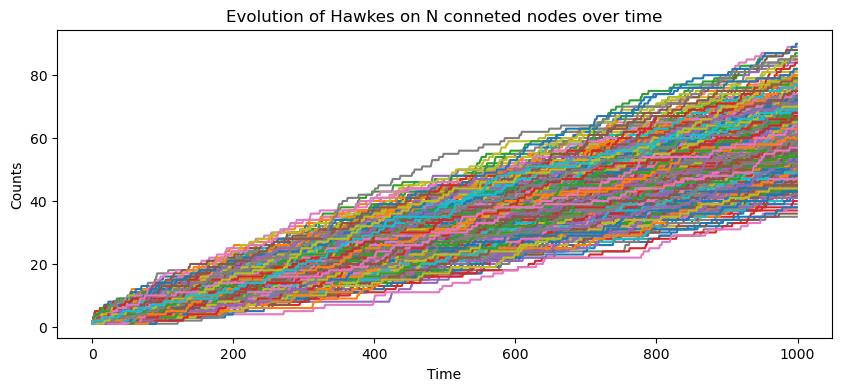

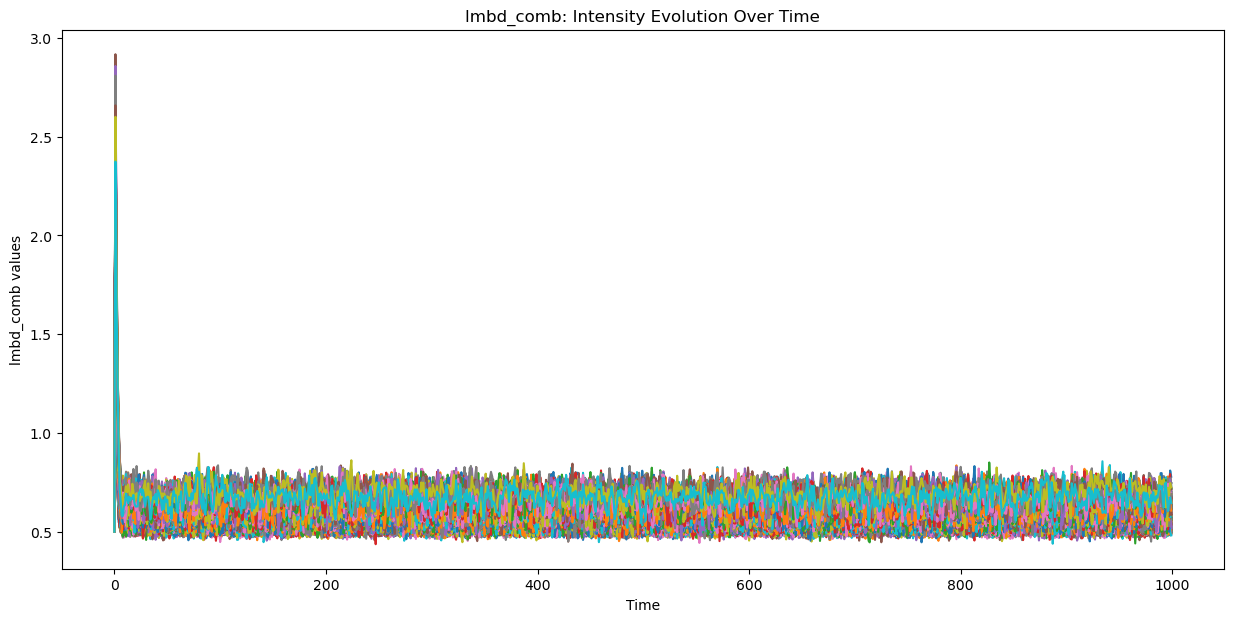

In [595]:
# Plot N_comb
plt.figure(figsize=(10, 4))
plt.plot(N_comb)
plt.title('Evolution of Hawkes on N conneted nodes over time')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.savefig('multiv_hawkes')
plt.show()


# Plot lmbd_comb
plt.figure(figsize=(15, 7))
plt.plot(lmbd_comb)
plt.title('lmbd_comb: Intensity Evolution Over Time')
plt.xlabel('Time')
plt.ylabel('lmbd_comb values')
plt.savefig('multiv_hawkes_lambda')
plt.show()

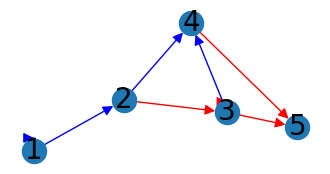

In [511]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an example network
G = nx.DiGraph()

# Add nodes
nodes = range(1, 6)  # Example with 5 nodes
G.add_nodes_from(nodes)

# Add edges with attributes (0: no relation, 1: excitation, -1: inhibition)
edges = [
    (1, 2, 1),
    (2, 3, -1),
    (3, 4, 1),
    (4, 5, -1),
    (2, 4, 1),
    (3, 5, -1),
    (1, 1, 1),  # Self-excitation
    (3, 3, -1)  # Self-inhibition
]

for edge in edges:
    G.add_edge(edge[0], edge[1], relation=edge[2])

# Define node positions
pos = nx.spring_layout(G)

plt.figure(figsize=(4, 2))  # Width and height in inches

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# Draw edges excluding no relation edges
excitation_edges = [(u, v) for u, v, d in edges if d == 1]
inhibition_edges = [(u, v) for u, v, d in edges if d == -1]

# Draw excitation and inhibition edges with different colors
nx.draw_networkx_edges(G, pos, edgelist=excitation_edges, edge_color='blue', arrowstyle='-|>', arrowsize=15)
nx.draw_networkx_edges(G, pos, edgelist=inhibition_edges, edge_color='red', arrowstyle='-|>', arrowsize=15)


# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

# Show the plot
#plt.title('Example Network with Excitation and Inhibition')
plt.axis('off')
plt.savefig("network.pdf")
plt.show()
